<a href="https://colab.research.google.com/github/Reign2121/Mining-project/blob/main/HR_EDA%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
hr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/WA_Fn-UseC_-HR-Employee-Attrition 2.csv")

#데이터 검사
pd.options.display.max_columns = None
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

카테고리형으로 변환 not str

In [6]:
#의미를 가지고 있는 int형 데이터 Category형으로 변환
change_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
hr.replace({'Education': change_dict}, inplace=True)

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
hr.replace({'EnvironmentSatisfaction': change_dict}, inplace=True)

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
hr.replace({'JobInvolvement': change_dict}, inplace=True)

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
hr.replace({'JobSatisfaction': change_dict}, inplace=True)

change_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
hr.replace({'PerformanceRating': change_dict}, inplace=True)

change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
hr.replace({'RelationshipSatisfaction': change_dict}, inplace=True)

change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
hr.replace({'WorkLifeBalance': change_dict}, inplace=True)

hr = hr.astype({'JobLevel': str, 'StockOptionLevel': str, 'NumCompaniesWorked': str})

hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2


In [7]:
hr.shape

(1470, 35)

In [8]:
hr.dtypes 

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked          object
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel            object
TotalWorkingYears   

In [9]:
hr.describe() #int type 데이터 통계치 확인
#employeecount,standardhours 값이 모두 같음 - 분석 전 제거

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,6502.931293,14313.103401,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,4707.956783,7117.786044,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1009.000000,2094.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2911.000000,8047.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,4919.000000,14235.500000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,8379.000000,20461.500000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,19999.000000,26999.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
#data 고유값 확인
for column in hr.columns:
    print(f"{column}: Number of unique values {hr[column].nunique()}")
    print("==========================================================")
#EmployeeNumber 변수 모두 다른 값 - 나중에 제거

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [10]:
#category type 데이터 분포 확인
cat_type=[]
for i in range(35):
    if type(hr.iloc[0,i])==str:
        cat_type.append(hr.columns[i])
        print('---------------------------')
        print(hr.iloc[:,i].value_counts())
#over18 모두 1값 - 나중에 제거

---------------------------
No     1233
Yes     237
Name: Attrition, dtype: int64
---------------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
---------------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
---------------------------
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64
---------------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
---------------------------
High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64
---------------------------
Male      882
Female    588
Name: Gender, dtype: int64
---------------------------
High   

In [12]:
hr.isna().sum() #결측치 없음

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

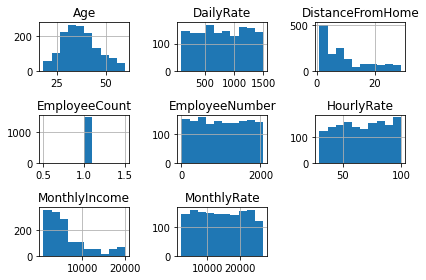

In [13]:
#int type 데이터 분포 
hr.iloc[:,0:20].hist()
plt.tight_layout()
plt.show()

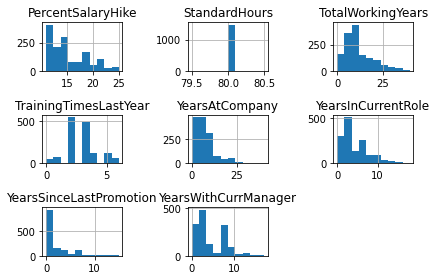

In [14]:
#int type 데이터 분포2
hr.iloc[:,21:].hist()
plt.tight_layout()
plt.show()

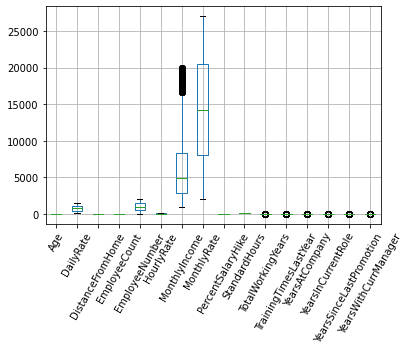

In [15]:
hr.boxplot()
plt.xticks(rotation=60)
plt.show()
#monthlyincome 과 monthlyrate 값들 다른 변수들에 비해 단위가 크다.

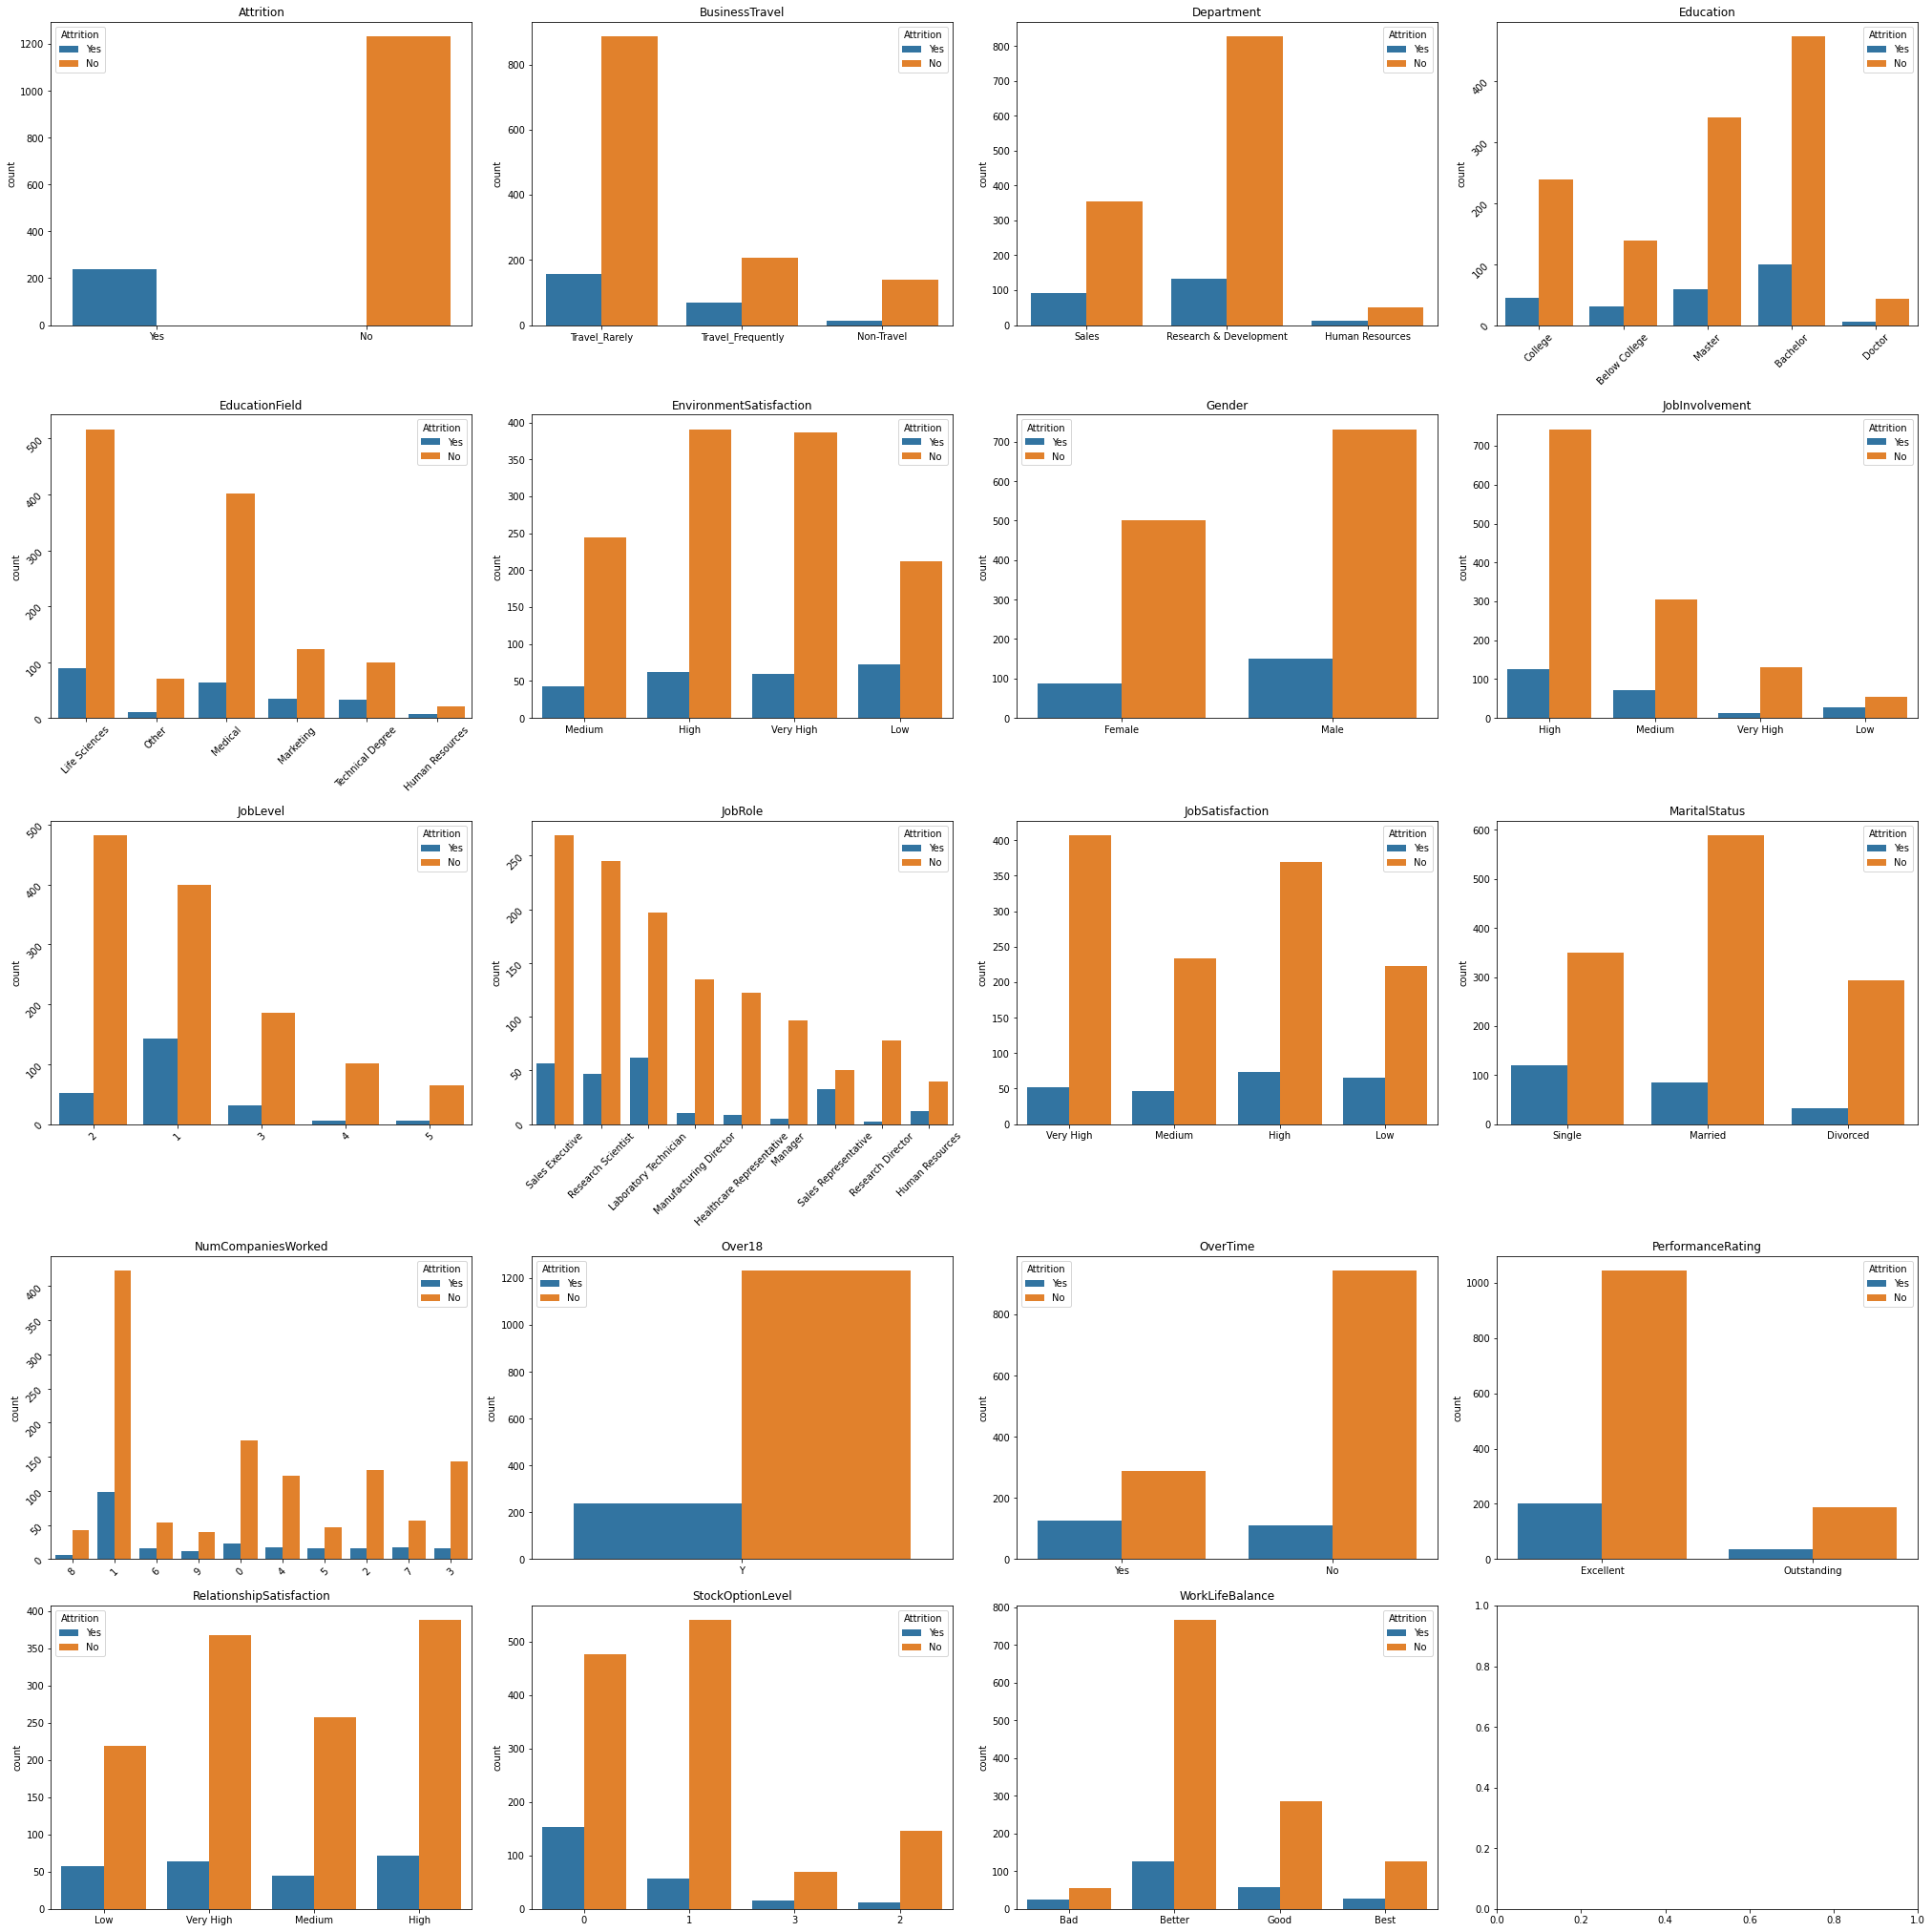

In [17]:
#attrition별 str 변수들의 분포
fig, ax = plt.subplots(5, 4, figsize=(28, 28), constrained_layout=True)
ax = ax.flatten()

for i in range(len(cat_type)):
    sns.countplot(x=cat_type[i], data=hr,
                      hue='Attrition', ax=ax[i]).set(xlabel = None)
    ax[i].set(title = cat_type[i])
    
    if hr[cat_type[i]].nunique() >= 5:
        ax[i].tick_params(labelrotation=45)
        
plt.show()

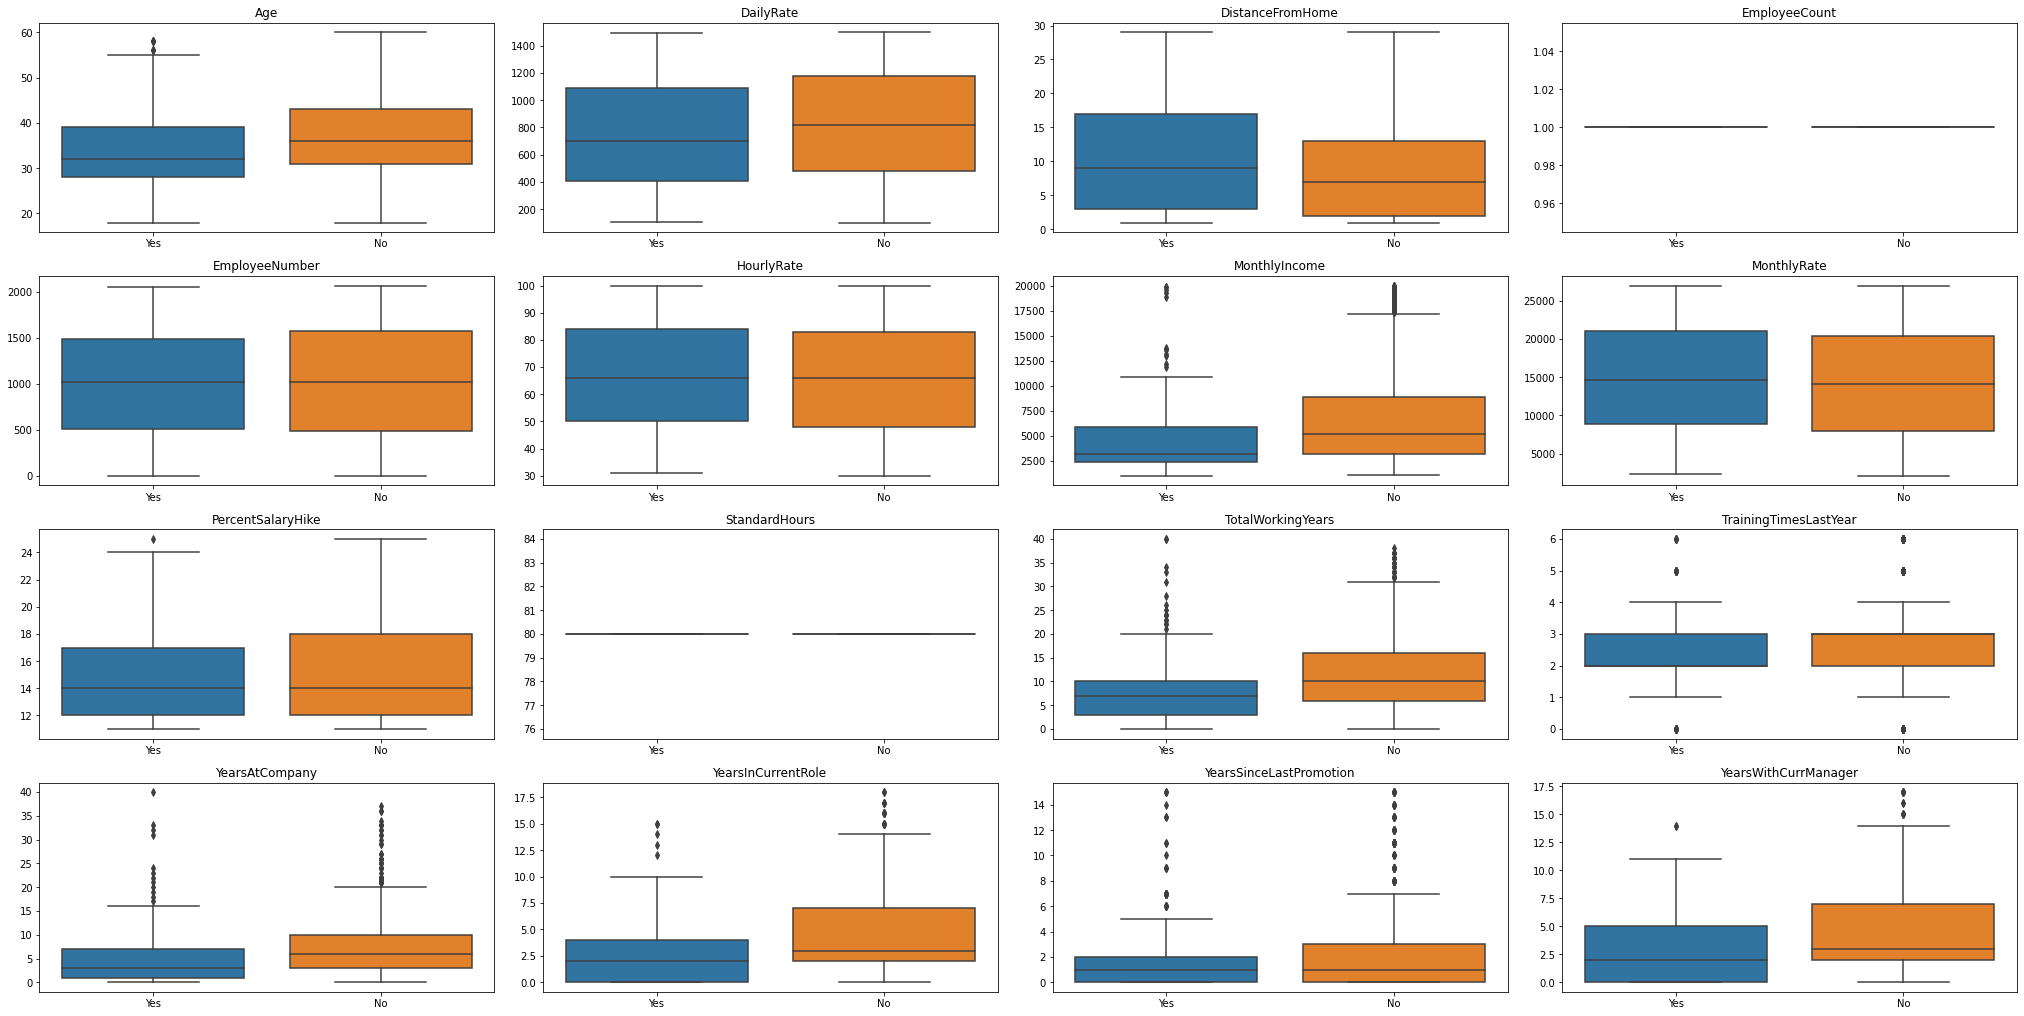

In [18]:
#attrition별 int type 변수들의 분포
int_type = hr.columns.drop(cat_type)

fig, ax = plt.subplots(4, 4, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()

for i in range(len(int_type)):
    ax[i].set(title = int_type[i])
    sns.boxplot(x=hr['Attrition'], y = [int_type[i]], ax=ax[i]).set(xlabel=None,  ylabel=None)
    
plt.show()

#변수 제거(모두 같은 값만 가지므로)
hr.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)